In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from birds import extract_audio
import soundfile
import IPython.display as ipd
import warnings

In [2]:
def plot_fft(samples):
    fft_samples = np.fft.fft(samples)
    plt.plot(np.abs(fft_samples[:len(fft_samples)//2]))

In [3]:
def plot_wave(samples, highlight):
    plt.plot(samples)
    if highlight is not None:
        highlight_start, highlight_stop=highlight
        plt.axvspan(highlight_start, highlight_stop, alpha=0.5, color="green")

In [4]:
def plot_spectrogram(samples):
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(samples))))

In [5]:
def plot_samples(samples, highlight_wave=None):
    ax1 = plt.subplot(3, 1, 1)
    ax1.set_title("Wave")
    plot_wave(samples, highlight_wave)
    
    ax2 = plt.subplot(3, 1, 2)
    ax2.set_title("FFT")
    plot_fft(samples)
    
    ax3 = plt.subplot(3, 1, 3)
    ax3.set_title("Spectrogram")
    plot_spectrogram(samples)
    
    plt.subplots_adjust(hspace=0.4)

In [6]:
bird = "blue_tit"
index = 4

## Short Sound

In [7]:
short_sound_path = f"data/{bird}/short/{bird}_{index}_short.ogg"
samples_short, sample_rate_short = librosa.load(short_sound_path)

ipd.Audio(short_sound_path)

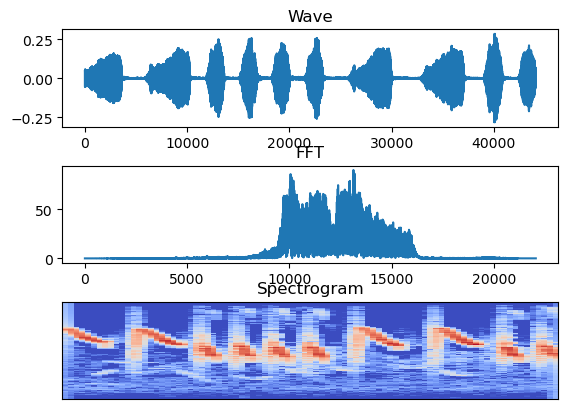

In [8]:
plot_samples(samples_short)

## Long sound

In [9]:
long_sound_path = f"data/{bird}/long/{bird}_{index}_long.mp3"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    samples_long, sample_rate_long = librosa.load(long_sound_path)
high_samples, start_idx = extract_audio.n_with_highest_power(samples_long, sample_rate_long * 2)

ipd.Audio(long_sound_path)

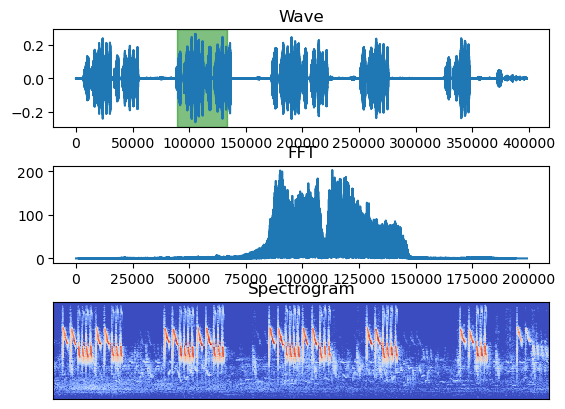

In [10]:
plot_samples(samples_long, (start_idx, start_idx+high_samples.size))